In [3]:
#proiect final analiza datelor 
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
rat=pd.read_csv(r"data_prj/ratings.csv",nrows=100000)
mov=pd.read_csv(r"data_prj/movies.csv",nrows=100000)
tags=pd.read_csv(r"data_prj/tags.csv",nrows=100000)
# selectez coloanele care ma intreseaza din fiecare fisier 

#ratings.csv

userId=rat["userId"]
movieId=rat["movieId"]
rating=rat["rating"]
timest=rat["timestamp"]

#movie.csv

movId=mov["movieId"]
title=mov["title"]


nr_inre_ra=rating.size
print(nr_inre_ra)

nr_inre_mv=title.size
print(nr_inre_mv)



100000
87585


In [5]:

#Calculez suma raitingurilor

suma_rat=rat["rating"].sum()
print(suma_rat)
#Calculez media generala a raitingurilor

medie_rat=suma_rat/nr_inre_ra
print(medie_rat)

352052.5
3.520525


In [6]:
# pun intr-un nou df valorile centrate de raiting fata de medie 
#calculez (xi-medie)

rat_op_medie=rat["rating"]- medie_rat
print(rat_op_medie)

0        0.479475
1       -2.520525
2       -1.520525
3        1.479475
4        1.479475
           ...   
99995   -0.520525
99996   -0.520525
99997   -1.020525
99998    0.479475
99999   -1.020525
Name: rating, Length: 100000, dtype: float64


In [7]:
#calculez (xi-medie)^2

rat_op_medie_pt=pow(rat_op_medie,2)
print(rat_op_medie_pt)

0        0.229896
1        6.353046
2        2.311996
3        2.188846
4        2.188846
           ...   
99995    0.270946
99996    0.270946
99997    1.041471
99998    0.229896
99999    1.041471
Name: rating, Length: 100000, dtype: float64


In [8]:
nr_inre_ra=rating.size
print(nr_inre_ra)

fractie=1/nr_inre_ra
print(fractie)
suma_dist_pt= rat_op_medie_pt.sum()
print(suma_dist_pt)

varianta_tot=fractie*suma_dist_pt
print(varianta_tot)

100000
1e-05
115018.12243750002
1.1501812243750003


In [9]:
min_rating=rat["rating"].min()
print(min_rating)
max_rating=rat["rating"].max()
print(max_rating)

0.5
5.0


In [10]:
# calculez distributia Bernouli 
# domeniul A=[min_rating,max_rating]
# voi defini functia f in care voi face comparatie cu raiting < 4

# suma_mic_4=0
# suma_mar_4=0
# for rating in rat["rating"]:
#     if(rating < 4):
#         suma_mic_4+=1
#     else:
#         suma_mar_4+=1

suma_mic_4=(rat["rating"] <4).sum()
suma_mar_4=(rat["rating"] >= 4).sum()

print(suma_mic_4)
print(suma_mar_4)


# calculez p si 1-p

p=suma_mic_4/nr_inre_ra
print(p)
p1=suma_mar_4/nr_inre_ra
print(p1)

50718
49282
0.50718
0.49282


In [11]:
# for rati in rat["rating"]:
#     rat['expp']=math.exp(-pow(rati-medie_rat,2)/(2*pow(varianta_tot,2)))
#     print(expp)

#alta varianta 

rat['expp'] = np.exp(-((rat["rating"] - medie_rat) ** 2) / (2 * (varianta_tot ** 2)))

In [12]:
#radical(2pi*sigma^2)
radical=np.sqrt(2*math.pi*pow(varianta_tot,2))
print(radical)
fractie_radical=1/radical
print(fractie_radical)

2.8830767779680784
0.34685167167305736


In [16]:
# calculez functia f(x)

# for ex in rat['expp']:
rat['diff']=ex*fractie_radical
print(rat['diff'])

0        0.233988
1        0.233988
2        0.233988
3        0.233988
4        0.233988
           ...   
99995    0.233988
99996    0.233988
99997    0.233988
99998    0.233988
99999    0.233988
Name: diff, Length: 100000, dtype: float64


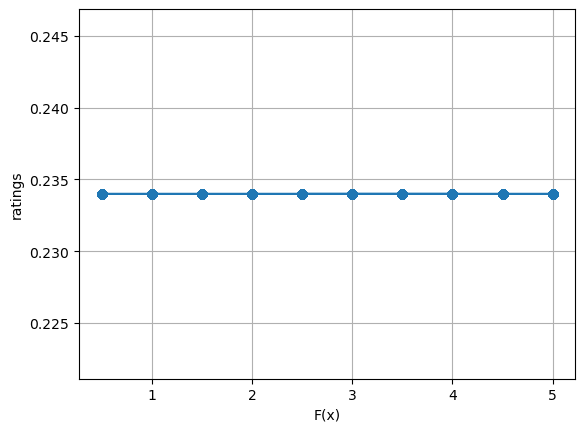

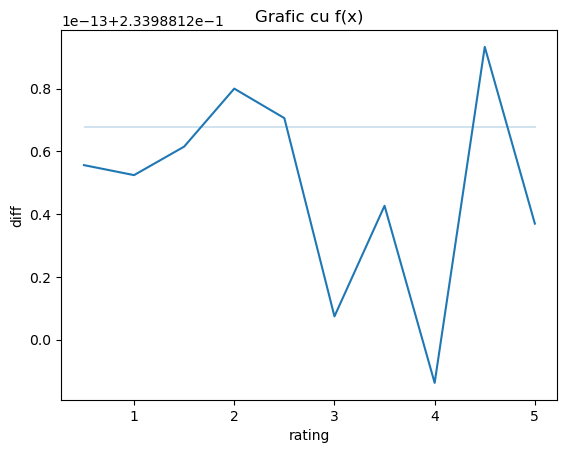

In [23]:
plt.plot(rat['rating'], rat['diff'],marker='o')

plt.xlabel("F(x)")
plt.ylabel("ratings")
plt.grid()
plt.show()

import seaborn as sns

sns.lineplot(data=rat, x="rating", y="diff")
plt.title("Grafic cu f(x)")
plt.show()

In [29]:
rat['nr_useri_mv']=rat.groupby("movieId").size()
# print(nr_useri_mv)

In [35]:
# #medie useri
# #nr useri
rat['nr_useri']=rat['userId'].count()
print(nr_useri)

suma_useri=rat['nr_useri_mv'].sum()
print(suma_useri)
medie_us=suma_useri/nr_useri
print(medie_us)

#calculez minim pe coloana
min_us=rat['nr_useri_mv'].min()
print(min_us)
max_us=rat['nr_useri_mv'].max()
print(max_us)

100000
89606.0
0.89606
1.0
319.0


In [40]:
#voi calcula Z score pt coloana rating 

#calculez (xi-medie) rating 
rat['rat_op_medie']=rat["rating"]- medie_rat
# print(rat['rat_op_medie'])


varianta_tot=fractie*suma_dist_pt
# print(varianta_tot)

sigma=np.sqrt(varianta_tot)
# print(sigma)


# Z score rating

rat['zscore_rat']=rat['rat_op_medie']/sigma
print(rat['zscore_rat'])


0        0.447078
1       -2.350217
2       -1.417785
3        1.379509
4        1.379509
           ...   
99995   -0.485354
99996   -0.485354
99997   -0.951569
99998    0.447078
99999   -0.951569
Name: zscore_rat, Length: 100000, dtype: float64


In [49]:
#voi calcula Z score pentru coloana nr_useri_mv care reprezinta nr de voturi date/useri pentru fiecare film


# calculez (xi-medie) nr_useri_mv

rat['cent_use']=rat['nr_useri_mv']- medie_us
# print(rat['cent_use'])

# nan_nr=rat['cent_use'].isnull().sum()
# print(nan_nr)


# am completat valorile lipsa cu 0
rat['cent_use']=rat['cent_use'].fillna(0)
# print(rat['cent_use'])

suma_usxi=rat['cent_use'].sum()
print(suma_usxi)
fractie=1/nr_inre_ra
# print(fractie)

varianta_totus=suma_usxi*fractie
print(varianta_totus)

sigma_us=np.sqrt(varianta_totus)
print(sigma_us)


# rat['zscore_us']=rat['cent_use']/sigma_us


82964.40327999998
0.8296440327999999
0.9108479745819277


In [55]:
# nr_useri_mv,rating
#calculez (xi-medie) rating 
rat['calcule']=rat['rat_op_medie']*rat['cent_use']
# print(rat['calcule'])

suma_cal=rat['calcule'].sum()
# print(suma_cal)


#calculez covarianta pentru cele 2 coloane

covarianta=suma_cal/suma_useri
print(covarianta)

covar_stand=fractie/(sigma_us*sigma)
print(covar_stand)

-0.10355689616010104
1.0236959052439191e-05


In [59]:
#normalizare (xi-min)/(max-xi) pt rating

rat['normalizare_rat']=((rat['rating']-min_rating)/(max_rating-rat['rating']))
# print(rat['normalizare_rat'])

#normalizare  (xi-min)/(max-xi) pt nr_useri_mv
rat['normalizare_nrusmv']= ((rat['nr_useri_mv']-min_us)/(max_us-rat['nr_useri_mv']))
# am completat valorile lipsa cu 0
rat['normalizare_nrusmv']=rat['normalizare_nrusmv'].fillna(0)
print(rat['normalizare_nrusmv'])

0        0.000000
1        1.839286
2        0.394737
3        0.100346
4        0.022508
           ...   
99995    0.000000
99996    0.003155
99997    0.000000
99998    0.000000
99999    0.000000
Name: normalizare_nrusmv, Length: 100000, dtype: float64


In [64]:
# print(rat['rat_op_medie'])

#Modul 
rat['modul_rat']=np.abs(rat['rat_op_medie'])
# print(rat['modul_rat'])
rat['modul_usmv']=np.abs(rat['calcule'])
print(rat['modul_usmv'])

0          0.000000
1        519.490133
2        137.005293
3         43.058552
4         10.510102
            ...    
99995      0.000000
99996      0.574628
99997      0.000000
99998      0.000000
99999      0.000000
Name: modul_usmv, Length: 100000, dtype: float64


In [66]:
# Centrare rating

rat['centrare_ratmv']=np.sqrt((rat['modul_rat'] **2)+(rat['modul_usmv']**2))
print(rat['centrare_ratmv'])

#caut maxim pe toate coloanele calculate 

max_centr=rat['centrare_ratmv'].max()
print(max_centr)

0          0.479475
1        519.496248
2        137.013731
3         43.083961
4         10.613721
            ...    
99995      0.520525
99996      0.775335
99997      1.020525
99998      0.479475
99999      1.020525
Name: centrare_ratmv, Length: 100000, dtype: float64
519.496248026391
